# Classification model using Decision Tree

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


### 2. Upload Clinic data

In [2]:
path ='../../../Data_preprocessing/Prediction PFS/Clinical_data_categorized_PFS.csv' 
data = pd.read_csv(path)
data.head(5)

,Unnamed: 0,RNA_ID,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,PFS,TM_TC_Ratio,...,MSKCC_NA,MSKCC_POOR,IMDC_FAVORABLE,IMDC_INTERMEDIATE,IMDC_NOT_REPORTED,IMDC_POOR,ImmunoPhenotype_Desert,ImmunoPhenotype_Excluded,ImmunoPhenotype_Infiltrated,ImmunoPhenotype_NA
0,0,NaN,73,0.0,0.0,2.0,808,0.0,1.545205,-1.0,...,0,0,0,0,1,0,0,0,1,0
1,1,NaN,55,0.0,0.0,2.0,1826,0.0,3.419178,-1.0,...,0,0,0,0,1,0,1,0,0,0
2,2,NaN,51,0.0,0.0,1.0,1541,0.0,1.413699,-1.0,...,0,0,0,0,1,0,0,0,1,0
3,3,NaN,70,0.0,0.0,3.0,-1,0.0,0.394521,-1.0,...,0,1,0,0,1,0,0,0,0,1
4,4,NaN,59,0.0,0.0,3.0,376,0.0,10.158904,-1.0,...,0,1,0,0,1,0,0,0,1,0


In [3]:
Y = [] # Target column
# For each entry I classified it by its PFS value.
for i in range (len(data)):
    if data.PFS[i]<3: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    else:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)

data = data.drop('PFS', axis=1) # As we won't need this column any more, I deleted it.

X = data.iloc[:,2:26] 
# I selected all the columns by removing the Unnamed column (row id) and the Target column.
print(X)
print('Number of patients: ',len(Y))

     Age  Sarc  Rhab  Number_of_Prior_Therapies  \
0     73   0.0   0.0                        2.0   
1     55   0.0   0.0                        2.0   
2     51   0.0   0.0                        1.0   
3     70   0.0   0.0                        3.0   
4     59   0.0   0.0                        3.0   
..   ...   ...   ...                        ...   
285   54   0.0   0.0                        3.0   
286   56   0.0   0.0                        2.0   
287   65   0.0   0.0                        2.0   
288   48   0.0   0.0                        1.0   
289   76   0.0   0.0                        2.0   

     Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy  \
0                                                  808             
1                                                 1826             
2                                                 1541             
3                                                   -1             
4                                              

### 3. Train-Test dataset split

In [64]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125)

# Convert sets to arrays
XTrain = XTrain.values
XTest = XTest.values

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 232
Target column size of the training set: 232
Test set size: 58
Target column size of the test set: 58


### 4. Select the parameters of the model and fit it

In [65]:
param_grid = {'min_samples_leaf': [2,5,7,10],
              'min_samples_split': [2, 5, 7, 10],
              'max_depth':[2,5,10,12,15,20,100],
              'criterion':['entropy','gini'],
              'splitter': ['best', 'random'],
              'random_state':[125]}

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.

clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 5, 10, 12, 15, 20, 100],
                         'min_samples_leaf': [2, 5, 7, 10],
                         'min_samples_split': [2, 5, 7, 10],
                         'random_state': [125],
                         'splitter': ['best', 'random']})

In [66]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
# Fit the model with the best parameters
model.fit(XTrain , yTrain)

Best estimate of parameters according to GridSearchCV:


DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=125)

In [67]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.6337650323774283


### 5. Prediction

In [68]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [69]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


### 6. Results

In [70]:
print('Final accuracy on the training dataset:' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset:0.7887931034482759
Final accuracy on the testing dataset: 0.5862068965517241


In [71]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[85 20]
 [29 98]]
Input data:  [1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1
 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1
 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1
 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0
 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1
 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1
 0 1 0 0 1 0 1 1 0 0]
Prediction:        [0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1
 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1
 0 1 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1
 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0
 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1
 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0

In [72]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       105
           1       0.83      0.77      0.80       127

    accuracy                           0.79       232
   macro avg       0.79      0.79      0.79       232
weighted avg       0.79      0.79      0.79       232



In [73]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[14 11]
 [13 20]]
Input data:  [1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1
 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0]
Prediction:        [1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1
 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1]


In [74]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.52      0.56      0.54        25
           1       0.65      0.61      0.62        33

    accuracy                           0.59        58
   macro avg       0.58      0.58      0.58        58
weighted avg       0.59      0.59      0.59        58



### 7. Results visualizaton

In [75]:
data.columns

Index(['Unnamed: 0', 'RNA_ID', 'Age', 'Sarc', 'Rhab',
       'Number_of_Prior_Therapies',
       'Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy',
       'Tumor_Shrinkage', 'TM_TC_Ratio', 'Cohort_CM-010', 'Cohort_CM-025',
       'Sex_Female', 'Sex_Male', 'MSKCC_FAVORABLE', 'MSKCC_INTERMEDIATE',
       'MSKCC_NA', 'MSKCC_POOR', 'IMDC_FAVORABLE', 'IMDC_INTERMEDIATE',
       'IMDC_NOT_REPORTED', 'IMDC_POOR', 'ImmunoPhenotype_Desert',
       'ImmunoPhenotype_Excluded', 'ImmunoPhenotype_Infiltrated',
       'ImmunoPhenotype_NA'],
      dtype='object')

In [76]:
from sklearn.tree import export_text

texto_modelo = export_text(
                    decision_tree = model,
                    feature_names = ['Age', 'Sarc', 'Rhab',
       'Number_of_Prior_Therapies',
       'Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy',
       'Tumor_Shrinkage', 'TM_TC_Ratio', 'Cohort_CM-010', 'Cohort_CM-025',
       'Sex_Female', 'Sex_Male', 'MSKCC_FAVORABLE', 'MSKCC_INTERMEDIATE',
       'MSKCC_NA', 'MSKCC_POOR', 'IMDC_FAVORABLE', 'IMDC_INTERMEDIATE',
       'IMDC_NOT_REPORTED', 'IMDC_POOR', 'ImmunoPhenotype_Desert',
       'ImmunoPhenotype_Excluded', 'ImmunoPhenotype_Infiltrated',
       'ImmunoPhenotype_NA']
               )
print(texto_modelo)

|--- Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy <= 1289.50
|   |--- Sex_Male <= 0.50
|   |   |--- MSKCC_FAVORABLE <= 0.50
|   |   |   |--- IMDC_INTERMEDIATE <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- IMDC_INTERMEDIATE >  0.50
|   |   |   |   |--- class: 0
|   |   |--- MSKCC_FAVORABLE >  0.50
|   |   |   |--- class: 1
|   |--- Sex_Male >  0.50
|   |   |--- Age <= 49.50
|   |   |   |--- IMDC_INTERMEDIATE <= 0.50
|   |   |   |   |--- Age <= 45.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  45.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- IMDC_INTERMEDIATE >  0.50
|   |   |   |   |--- Age <= 43.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  43.00
|   |   |   |   |   |--- class: 0
|   |   |--- Age >  49.50
|   |   |   |--- Age <= 62.50
|   |   |   |   |--- MSKCC_FAVORABLE <= 0.50
|   |   |   |   |   |--- Number_of_Prior_Therapies <= 1.50
|   |   |   |   |   |   |--- Age <= 58.50
|   |   |   |   |   |   |   |--- class: 

Tree depth: 9
Number of terminal nodes: 32


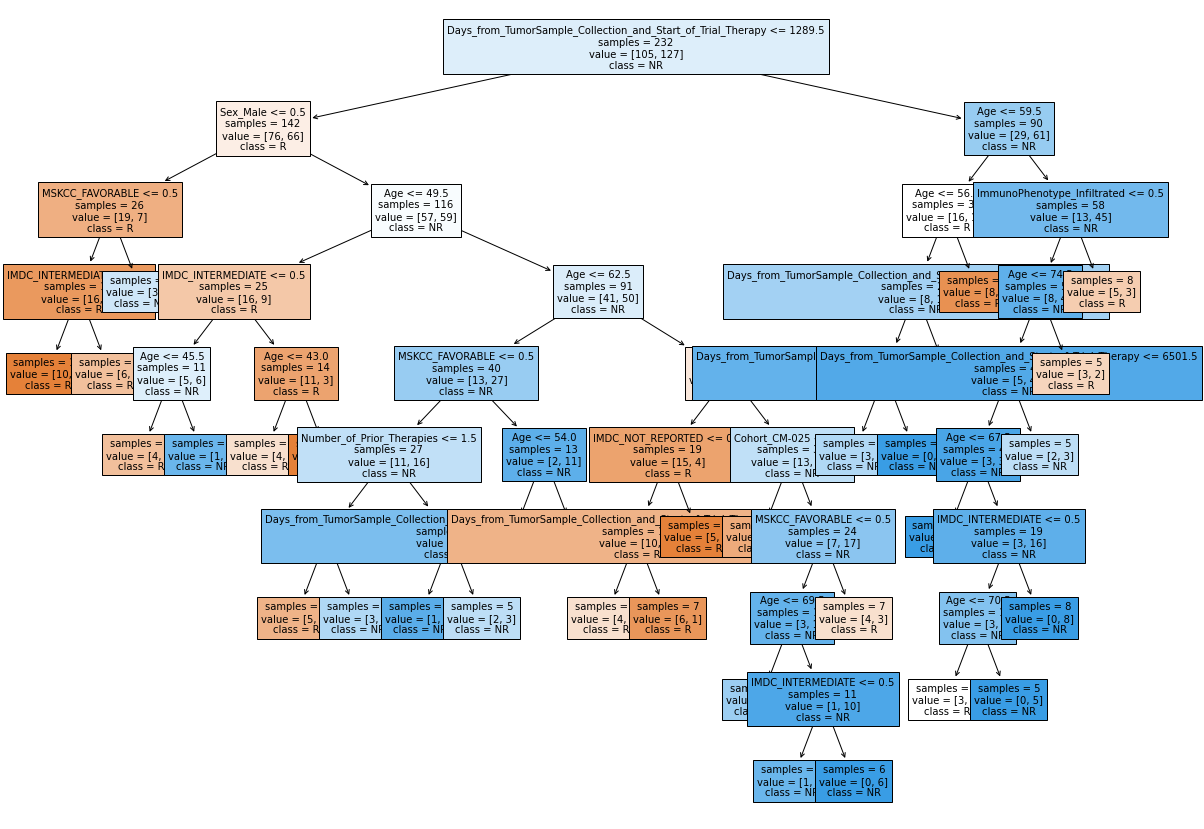

In [77]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(20, 15))

print(f"Tree depth: {model.get_depth()}")
print(f"Number of terminal nodes: {model.get_n_leaves()}")

plot = plot_tree(
            decision_tree = model,
            feature_names = ['Age', 'Sarc', 'Rhab',
       'Number_of_Prior_Therapies',
       'Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy',
       'Tumor_Shrinkage', 'TM_TC_Ratio', 'Cohort_CM-010', 'Cohort_CM-025',
       'Sex_Female', 'Sex_Male', 'MSKCC_FAVORABLE', 'MSKCC_INTERMEDIATE',
       'MSKCC_NA', 'MSKCC_POOR', 'IMDC_FAVORABLE', 'IMDC_INTERMEDIATE',
       'IMDC_NOT_REPORTED', 'IMDC_POOR', 'ImmunoPhenotype_Desert',
       'ImmunoPhenotype_Excluded', 'ImmunoPhenotype_Infiltrated',
       'ImmunoPhenotype_NA'],
            class_names   = ['R','NR'],
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

*Everolimus test*

In [78]:
path ='../../../Data_preprocessing/Testing with everolimus/Clinical_data_categorized_everolimus.csv'
data = pd.read_csv(path)

Y = [] # Target column
# For each entry I classified it by its PFS value.
for i in range (len(data)):
    if data.PFS[i]<3: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    else:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)
data=data.drop(['Unnamed: 0', 'PFS', 'RNA_ID'], axis=1)

In [79]:
data.head(5)

,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,TM_TC_Ratio,Cohort_CM-010,Cohort_CM-025,Sex_Female,...,MSKCC_NA,MSKCC_POOR,IMDC_FAVORABLE,IMDC_INTERMEDIATE,IMDC_NOT_REPORTED,IMDC_POOR,ImmunoPhenotype_Desert,ImmunoPhenotype_Excluded,ImmunoPhenotype_Infiltrated,ImmunoPhenotype_NA
0,59,0.0,0.0,1.0,1039,0.0,-1.0,0.0,1,0,...,0.0,0,0,1,0,0,0.0,0.0,0,1
1,72,0.0,0.0,1.0,544,0.0,-1.0,0.0,1,0,...,0.0,0,1,0,0,0,0.0,0.0,0,1
2,62,0.0,0.0,1.0,246,0.0,-1.0,0.0,1,0,...,0.0,0,0,0,1,0,0.0,0.0,0,1
3,56,0.0,0.0,1.0,4038,0.0,-1.0,0.0,1,0,...,0.0,0,0,1,0,0,0.0,0.0,0,1
4,81,0.0,0.0,2.0,-1,0.0,-1.0,0.0,1,0,...,0.0,0,0,1,0,0,0.0,0.0,0,1


In [80]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(data)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(Y),1) :
    if (yhatTest[i] == Y[i]):
        contTest = contTest + 1

print('Final accuracy on the testing dataset: ' + str(contTest/len(Y)))

Final accuracy on the testing dataset: 0.5416666666666666


In [81]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(Y,yhatTest))
print('Input data:  ' + str(np.array(Y)))
print('Prediction:        ' +str(yhatTest))
print(classification_report(Y,yhatTest))

----------------Confusion Matrix (Test)------------------
[[31 34]
 [43 60]]
Input data:  [1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1
 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0
 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0]
Prediction:        [1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1
 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1
 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1
 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1]
              precision    recall  f1-score   support

           0       0.42      0.48      0.45        65
           1       0.64      0.58      0.61       103

    accuracy                           0.54